In [17]:
!pip install tensorflow
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from tensorflow.keras.datasets import reuters
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [19]:
"""
  Loading in the data.

  - As with the IMDB reviews, each example is a list of integers (word indices)
  - The label associated with an example is an integer between 0-45 (topic index)
"""

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [20]:
# ------------- Preparing the data -------------#


# Encoding the input data
def vectorize_sequences(sequences, dimension=10000):
  """
    Creates vectors of 0's and 1's where each row corresponds to a sequence and 
    each column corresponds to a specific word in a predefined vocabulary. 
    
    If a word appears in a sequence, the corresponding entry in the matrix is 
    set to 1, otherwise it is left as 0.
  """
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1

  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


# Encoding the labels with one-hot/categorical encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


"""
Alternatively, you can encode the labels by casting them as an integer tensor.

NOTE: If using this approach, the loss function must be set 
to "sparse_categorical_crossentropy"

y_train = np.array(train_labels)
y_test = np.array(test_labels)

"""


In [21]:
# ------------- Building the model -------------#

"""
  Because the number of output classes is 46, the dimensionality of the
  output space is much larger than that of a Binary classification problem.

  The last layer uses a softmax activation. This means the model will output
  a probability distribution over the 46 different output classes
"""

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",  # Measures the distance between two probability distributions. In this case, probability distribution and the true distribution
    metrics=["accuracy"]
)


Epoch 1/20
16/16 [==============================] - 6s 49ms/step - loss: 2.7828 - accuracy: 0.5163 - val_loss: 1.9228 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.5754 - accuracy: 0.6760 - val_loss: 1.3834 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.1778 - accuracy: 0.7409 - val_loss: 1.1780 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.9648 - accuracy: 0.7895 - val_loss: 1.0791 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.8059 - accuracy: 0.8257 - val_loss: 1.0153 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6791 - accuracy: 0.8547 - val_loss: 0.9456 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5676 - accuracy: 0.8800 - val_loss: 0.9104 - val_accuracy: 0.8070
Epoch 8/20
16

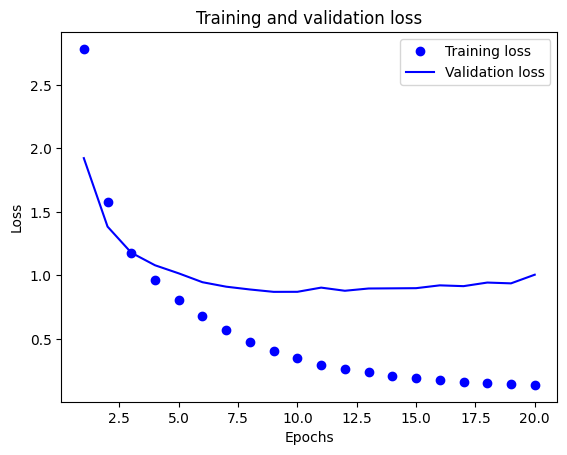

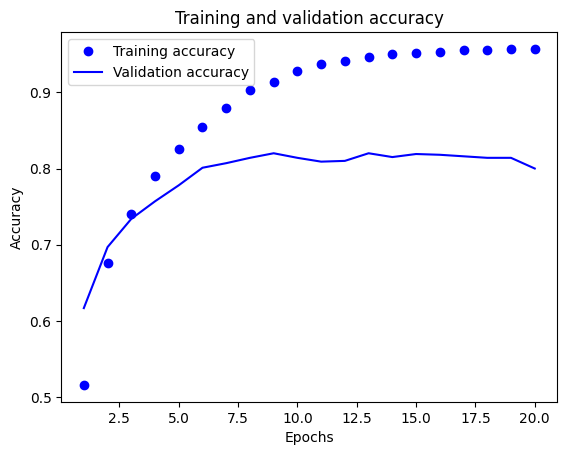

In [22]:
# ------------- Validating the model -------------#

# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


# Training the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

# display loss and accuracy curves
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
# ------------- Retraining the model to address overfitting -------------#

model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512
)

results = model.evaluate(x_test, y_test)


Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 2.2522 - accuracy: 0.5754
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.2188 - accuracy: 0.7488
Epoch 3/9
18/18 [==============================] - 0s 18ms/step - loss: 0.9000 - accuracy: 0.8105
Epoch 4/9
18/18 [==============================] - 0s 25ms/step - loss: 0.7070 - accuracy: 0.8526
Epoch 5/9
18/18 [==============================] - 0s 23ms/step - loss: 0.5688 - accuracy: 0.8872
Epoch 6/9
18/18 [==============================] - 0s 22ms/step - loss: 0.4672 - accuracy: 0.9058
Epoch 7/9
18/18 [==============================] - 0s 21ms/step - loss: 0.3898 - accuracy: 0.9191
Epoch 8/9
18/18 [==============================] - 0s 17ms/step - loss: 0.3315 - accuracy: 0.9303
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.8208 - accuracy: 0.8090


## Key Takeaways:

* When classifying data points among **N** classes, the model should end with a Dense layer of size **N**
* In a single-label, multiclass classification problem, the model should end with a **softmax activation** so that it will output a probability distribution over the N output classes
* Categorical crossentropy is almost **always** the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets.
* 2 Ways to handle labels in multiclass classification:
  1. Encoding the labels via categorical encoding (aka one-hot encoding) and using **"categorical_crossentropy"** as the loss function.
  2. Encode the labels as integers and using **"sparse_categorical_crossentropy"** as the loss function